## June 17th 

### Today i am going to dive into taking multiple inputs through langraph using list , dictonaries 

In [1]:
from typing import TypedDict, List 
from langgraph.graph import StateGraph 


In [2]:
class multiagentstate(TypedDict):
    values:List[int]
    name: str 
    result : str # here we handling 3 diff datatype structures 

In [25]:
def process_values(state: multiagentstate) -> multiagentstate:
    """ this handles different data structures """

    print(state)
    state["result"] = f'Hey {state["name"]}! here is your sum = {sum(state["values"])}'
    print(state)
    return state 
    

In [26]:
graph = StateGraph(multiagentstate)

graph.add_node("multiprocessor",process_values)

graph.set_entry_point("multiprocessor")

graph.set_finish_point("multiprocessor")

app = graph.compile()

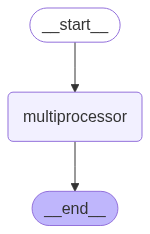

In [27]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))


In [29]:
answer = app.invoke({"values": [112,321,4332,12321],"name" : "August"})

print (answer["result"]) # if u dont pass any value langgraph passes it as null values

{'values': [112, 321, 4332, 12321], 'name': 'August'}
{'values': [112, 321, 4332, 12321], 'name': 'August', 'result': 'Hey August! here is your sum = 17086'}
Hey August! here is your sum = 17086


## Sequential Graph 

### this is used for building mutliple nodes that sequentially process and update different parts of the state ,invoking the graph to see how state is transformed step - by - step  and yeah this would give me the clarity to see how to create and handle multiple nodes 

In [63]:
class AgentState(TypedDict):
    name: str
    age: str 
    final: str


In [70]:
def first_node ( state : AgentState) -> AgentState:
    """ this is the first node of our sequence """

    state["final"] = f'hi {state["name"]}'

    return state 

def second_node ( state : AgentState) -> AgentState:
    """ this is the second node of our sequence """

    state["final"] = state['final'] + f' you are  {state["age"]} years old!'

    return state 


In [71]:
graph2 = StateGraph(AgentState)

graph2.add_node("first", first_node)

graph2.add_node("second", second_node)

graph2.set_entry_point("first")

graph2.add_edge("first", "second")

graph2.set_finish_point("second")

app = graph2.compile()



 

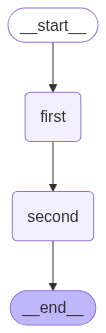

In [72]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
results2 = app.invoke({'name' : "august" , 'age' : 20})

print(results2['final'])

hi august you are  20 years old!
